# GlobalPowerPlant_Project is a Regression and Classification Problem

In [1]:
print(('*'*127))
print("                                                      Global Power Plant                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Global Power Plant                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 28)


df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

* Here we that there is 907 Rows and 27 Columns for this Dataset

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
                             ...   
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
Length: 27, dtype: object

* Here we observe that majority of the Columns are of float and object type and primary_fuel, capacity_mw is our Target variable

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
                           ... 
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
Length: 27, dtype: int64

* For this dataset Treatment of Missing values is needed

# Dataset Descirption

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



# Attributes

The Following are the attributes which signifies the further prediction of the Attrition levels:

-- (1) Age : The age of each individuals in the dataset

-- (2) BusinessTravel: Determining wether or not the person travels to often

-- (3) DailyRate: The dailyRate given to the individual

-- (4) Department: The department refers to his feild of proffession 

-- (5) DistanceFromHome: The distance of office to Home

-- (6) Education: The full education received by the individual

-- (7) EducationField: The feild of personel expertise by the individual

-- (8) EmployeeCount: The Count of the Employees based on Department

-- (9) EmployeeNumber: The No of employees of the company

-- (10) EnvironmentSatisfaction: The satisfaction level by the individual on the enviroment

-- (11) Gender: The type of sex the individual belongs to 

-- (12) HourlyRate: The Hourly pay scale of the employee

-- (13) JobInvolvement: The score of an individual based on the devotness to the jpb

-- (14) JobLevel: The level of difficulty of the job

-- (15) JobRole: The given job role by the company

-- (16) JobSatisfaction: The rate of job and enviroment satisfaction by an individual

-- (17) MaritalStatus: categorising the married, divorced or not married status

-- (18) RelationshipSatisfaction: The rate of satisfaction in the personel life

-- (19) StandardHours: The standard working hours of an individual

-- (20) StockOptionLevel: The right to purchase stocks from the company

-- (21) TotalWorkingYears: The No of years the individual has been working

-- (22) TrainingTimesLastYear: The No of training given to an individual for improval

-- (23) WorkLifeBalance: The Rate of an individual balancing work and life

-- (24) YearsAtCompany: The No of years at a given comapny

-- (25) YearsInCurrentRole: The No of years at the same job role

-- (26) YearsSinceLastPromotion: The last when an individual was promoted

-- (27) YearsWithCurrManager: The No of years with the present or previous manager

# Data Cleaning

# Missing Values Treatment

<AxesSubplot:>

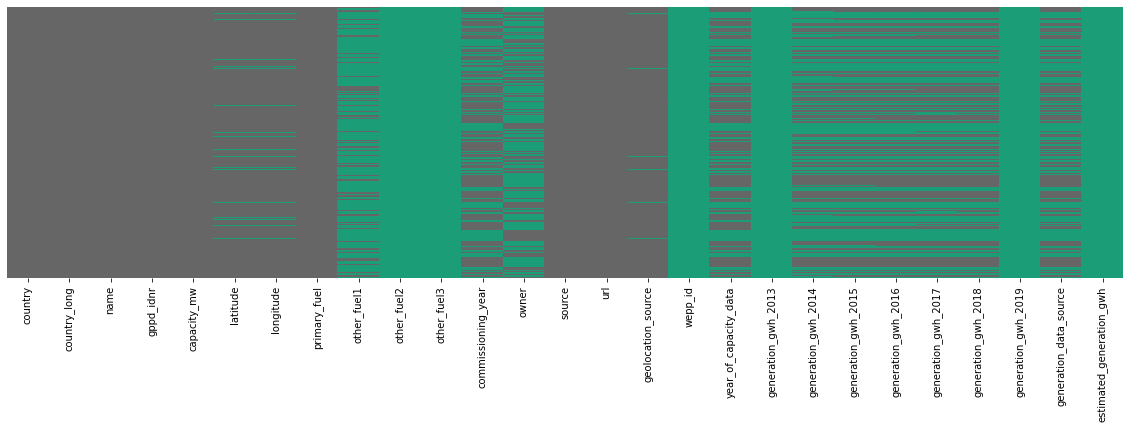

In [6]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

# Since Otherfuel2, 3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh are having all Null values we drop them

In [7]:
df.drop(columns=['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'],axis=1,inplace=True)

<AxesSubplot:>

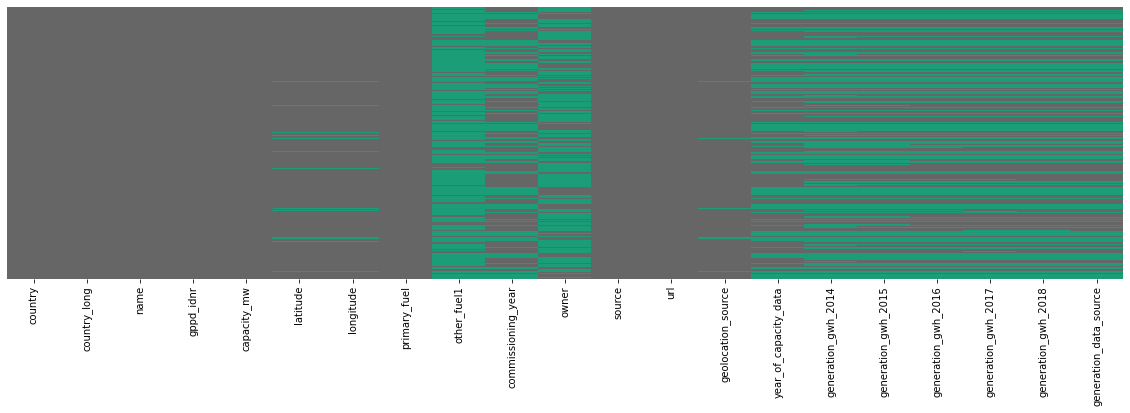

In [8]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [9]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['owner'].value_counts()

Jk Cement ltd                              4
Sterling Agro Industries ltd.              4
Acc Acc ltd                                4
Ujaas Energy Limited                       3
Shri Ssk ltd                               3
                                          ..
REI Agro Limited                           1
LEPL Projects Limited                      1
Roaring 40's Wind Farms Private Limited    1
Jawahar Ssk ltd                            1
Essel Clean Energy Limited                 1
Name: owner, Length: 280, dtype: int64

In [11]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [12]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [13]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [14]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [15]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [16]:
df['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Purna Ssk ltd                                  1
Purti Sugar ltd                                1
Unity Power Limite r World                     1
Rswm Rswm ltd                                  1
Kumbhi Ssk ltd                                 1
Name: source, Length: 191, dtype: int64

In [17]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [18]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [19]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [20]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude'])) 

In [21]:
df['latitude']

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [22]:
df['longitude']=df['longitude'].fillna(np.mean(df['latitude'])) 

In [23]:
df['latitude']

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

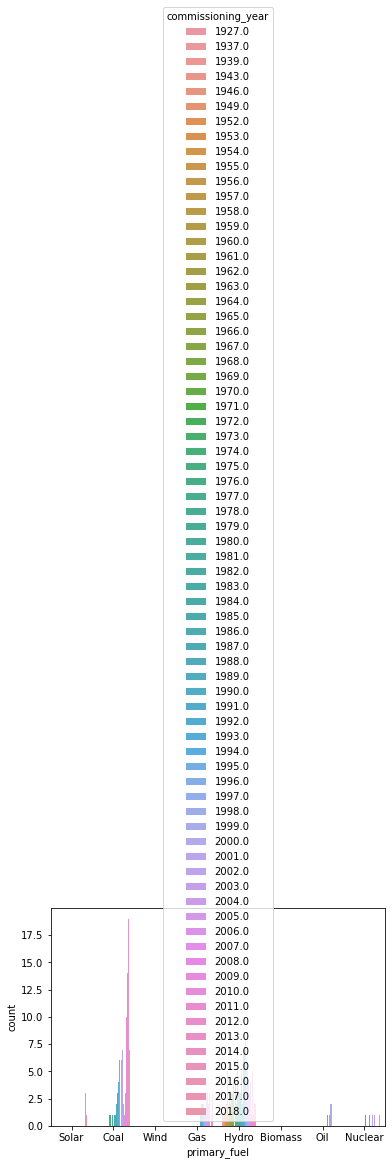

In [24]:
# Treating other fuel 1

sn.countplot(x='primary_fuel', hue='commissioning_year', data=df)

# LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["primary_fuel"] = lb.fit_transform(df["primary_fuel"])

In [26]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df['owner'].value_counts()

234.0    4
108.0    4
5.0      4
136.0    3
114.0    3
        ..
175.0    1
193.0    1
211.0    1
138.0    1
51.0     1
Name: owner, Length: 280, dtype: int64

In [28]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [29]:
df['other_fuel1'].value_counts()

2.0    195
1.0      2
0.0      1
Name: other_fuel1, dtype: int64

In [30]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [31]:
df['country_long'].value_counts()

0.0    907
Name: country_long, dtype: int64

In [32]:
df['country'].value_counts()

0.0    907
Name: country, dtype: int64

In [33]:
df['source'].value_counts()

22.0     519
21.0     124
84.0      10
109.0      8
110.0      6
        ... 
121.0      1
17.0       1
101.0      1
103.0      1
54.0       1
Name: source, Length: 191, dtype: int64

In [34]:
df['generation_data_source'].value_counts()

0.0    449
Name: generation_data_source, dtype: int64

In [35]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [36]:
df['geolocation_source'].value_counts()

2.0    765
0.0    119
1.0      4
Name: geolocation_source, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='other_fuel1'>

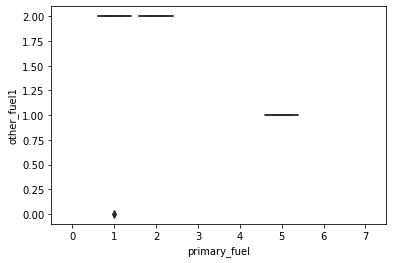

In [37]:
sn.boxplot(x='primary_fuel', y='other_fuel1',data=df, palette='BuPu')

In [38]:
def impute_other_fuel1(cols):
    other_fuel1=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(other_fuel1):
        if primary_fuel==1:
            return 0
        elif primary_fuel==2:
            return 2
        elif primary_fuel==5:
            return 1
        else:
            return 0
    else:
        return other_fuel1

In [39]:
df['other_fuel1'] = df[['other_fuel1', 'primary_fuel']].apply(impute_other_fuel1,axis=1)

<AxesSubplot:>

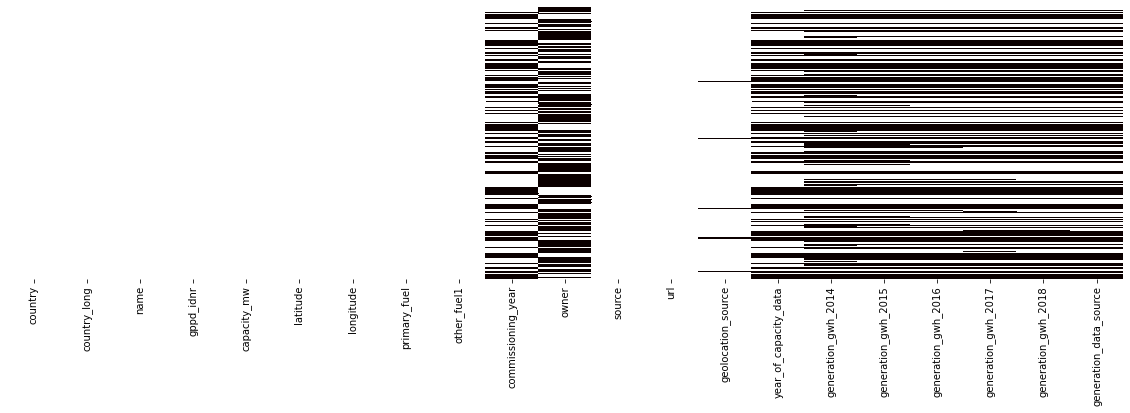

In [40]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

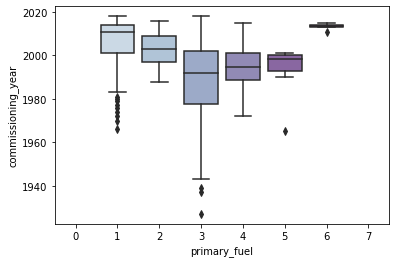

In [41]:
sn.boxplot(x='primary_fuel', y='commissioning_year',data=df, palette='BuPu')

In [42]:
import random

In [43]:
def impute_commissioning_year(cols):
    commissioning_year=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(commissioning_year):
        if primary_fuel==1:
            return random.randrange(2010, 2020)
        elif primary_fuel==2:
            return random.randrange(2000,2010)
        elif primary_fuel==3:
            return random.randrange(1980,1990)
        elif primary_fuel==4:
            return random.randrange(1990,2000)
        elif primary_fuel==5:
            return random.randrange(1999,2000)
        elif primary_fuel==6:
            return 2016
        else:
            return 2015
    else:
        return commissioning_year

In [44]:
df['commissioning_year'] = df[['commissioning_year', 'primary_fuel']].apply(impute_commissioning_year,axis=1)

In [45]:
df['commissioning_year']

0      2011.0
1      2015.0
2      2015.0
3      2004.0
4      2015.0
        ...  
902    2016.0
903    2016.0
904    2015.0
905    2012.0
906    2015.0
Name: commissioning_year, Length: 907, dtype: float64

<AxesSubplot:>

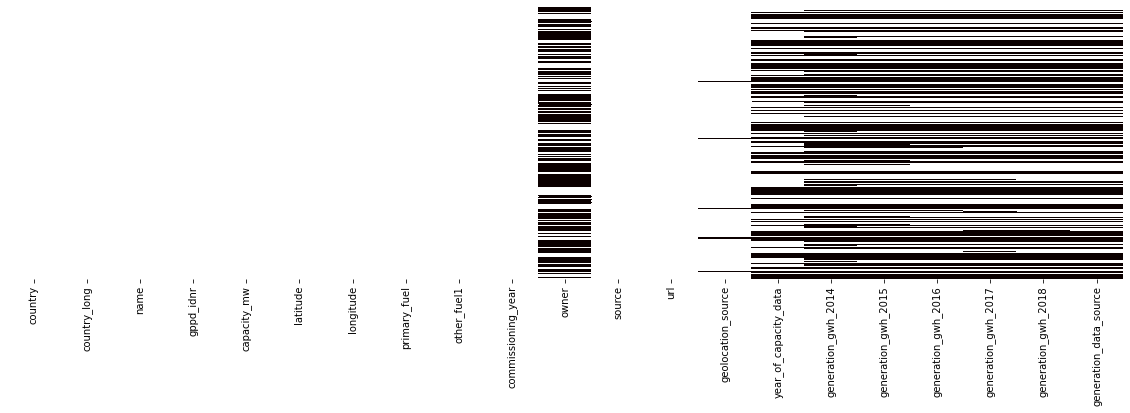

In [46]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='owner'>

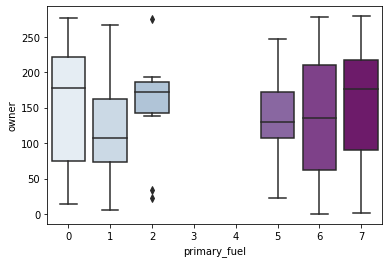

In [47]:
sn.boxplot(x='primary_fuel', y='owner',data=df, palette='BuPu')

In [48]:
def impute_owner(cols):
    owner=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(owner):
        if primary_fuel==0:
            return random.randrange(190.0,200.0)
        elif primary_fuel==1:
            return random.randrange(100.0,110.0)
        elif primary_fuel==2:
            return random.randrange(180.0,200.0)
        elif primary_fuel==5:
            return random.randrange(140.0,150.0)
        elif primary_fuel==6:
            return random.randrange(130.0,140.0)
        elif primary_fuel==7:
            return random.randrange(150.0,170.0)
        else:
            return 234.0
    else:
        return owner

In [49]:
df['owner'] = df[['owner', 'primary_fuel']].apply(impute_owner,axis=1)

In [50]:
df['owner']

0      229.0
1      258.0
2        2.0
3      195.0
4      101.0
       ...  
902    104.0
903    114.0
904    150.0
905     91.0
906    279.0
Name: owner, Length: 907, dtype: float64

<AxesSubplot:>

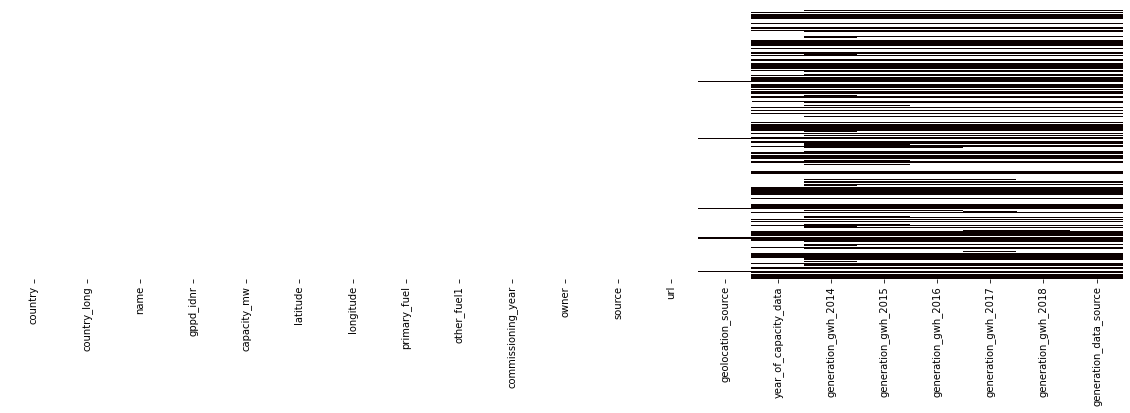

In [51]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='year_of_capacity_data'>

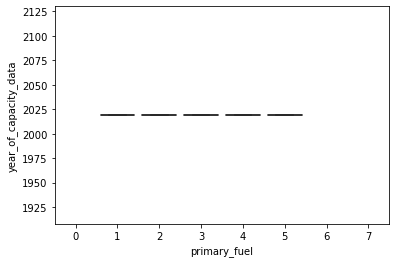

In [52]:
sn.boxplot(x='primary_fuel', y='year_of_capacity_data',data=df, palette='BuPu')

In [53]:
def impute_year_of_capacity_data(cols):
    year_of_capacity_data=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(year_of_capacity_data):
        if primary_fuel==1:
            return 2019
        elif primary_fuel==2:
            return 2019
        elif primary_fuel==3:
            return 2019
        elif primary_fuel==4:
            return 2019
        elif primary_fuel==5:
            return 2019
        else:
            return 2019
    else:
        return year_of_capacity_data

In [54]:
df['year_of_capacity_data'] = df[['year_of_capacity_data', 'primary_fuel']].apply(impute_year_of_capacity_data,axis=1)

<AxesSubplot:>

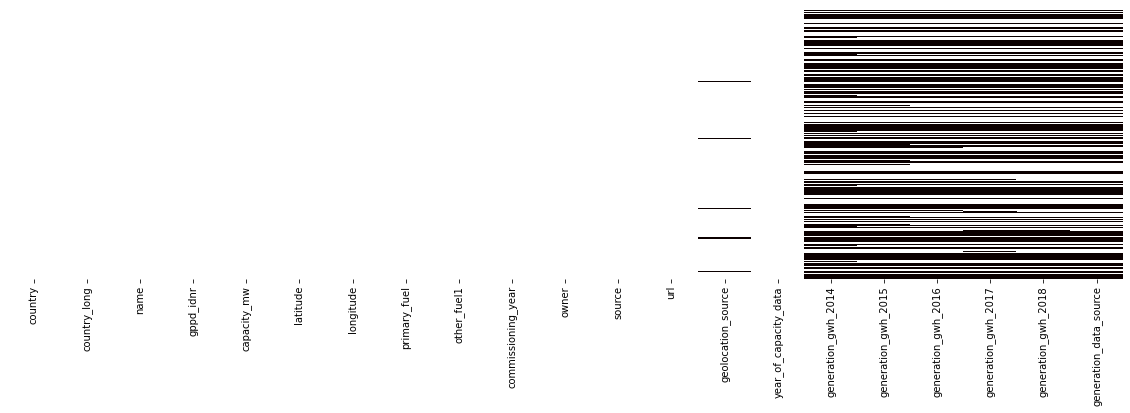

In [55]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

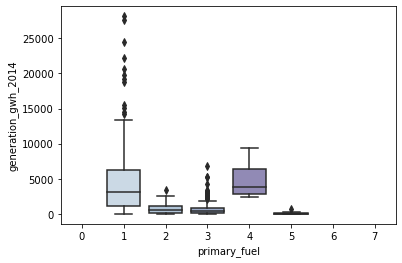

In [56]:
sn.boxplot(x='primary_fuel', y='generation_gwh_2014',data=df, palette='BuPu')

In [57]:
def impute_generation_gwh_2014(cols):
    generation_gwh_2014=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_gwh_2014):
        if primary_fuel==1:
            return random.randrange(0,5000)
        elif primary_fuel==2:
            return random.randrange(0,500)
        elif primary_fuel==3:
            return random.randrange(0,300)
        elif primary_fuel==4:
            return random.randrange(4000,5000)
        elif primary_fuel==5:
            return random.randrange(0,100)
        else:
            return random.randrange(0,5000)
    else:
        return generation_gwh_2014

In [58]:
df['generation_gwh_2014'] = df[['generation_gwh_2014', 'primary_fuel']].apply(impute_generation_gwh_2014,axis=1)

<AxesSubplot:>

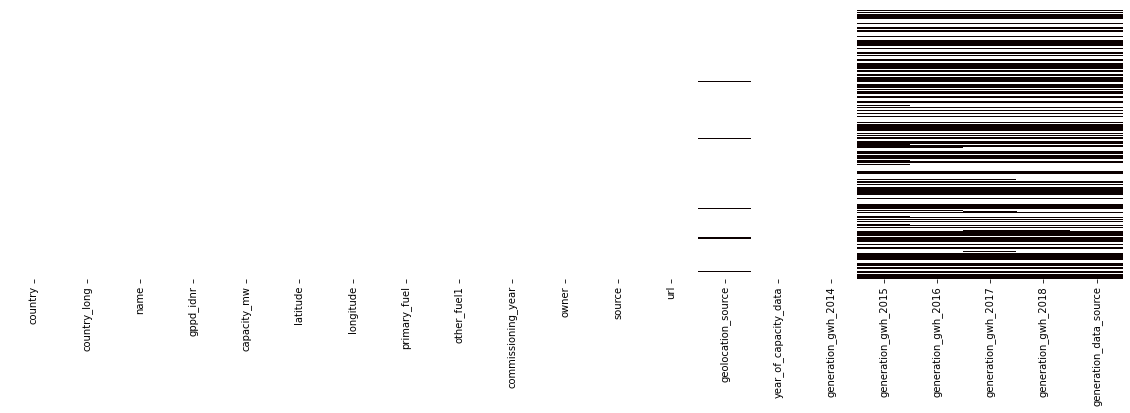

In [59]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

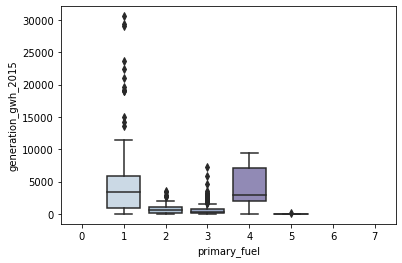

In [60]:
sn.boxplot(x='primary_fuel', y='generation_gwh_2015',data=df, palette='BuPu')

In [61]:
def impute_generation_gwh_2015(cols):
    generation_gwh_2015=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_gwh_2015):
        if primary_fuel==1:
            return random.randrange(0,5000)
        elif primary_fuel==2:
            return random.randrange(0,600)
        elif primary_fuel==3:
            return random.randrange(0,400)
        elif primary_fuel==4:
            return random.randrange(3000,5000)
        elif primary_fuel==5:
            return random.randrange(0,100)
        else:
            return random.randrange(0,5000)
    else:
        return generation_gwh_2015

In [62]:
df['generation_gwh_2015'] = df[['generation_gwh_2015', 'primary_fuel']].apply(impute_generation_gwh_2015,axis=1)

In [63]:
df['generation_gwh_2015']

0      1090.000000
1      4176.000000
2      4234.000000
3       843.747000
4      5916.370000
          ...     
902       0.994875
903     142.000000
904    4381.000000
905    1390.000000
906    1327.000000
Name: generation_gwh_2015, Length: 907, dtype: float64

<AxesSubplot:>

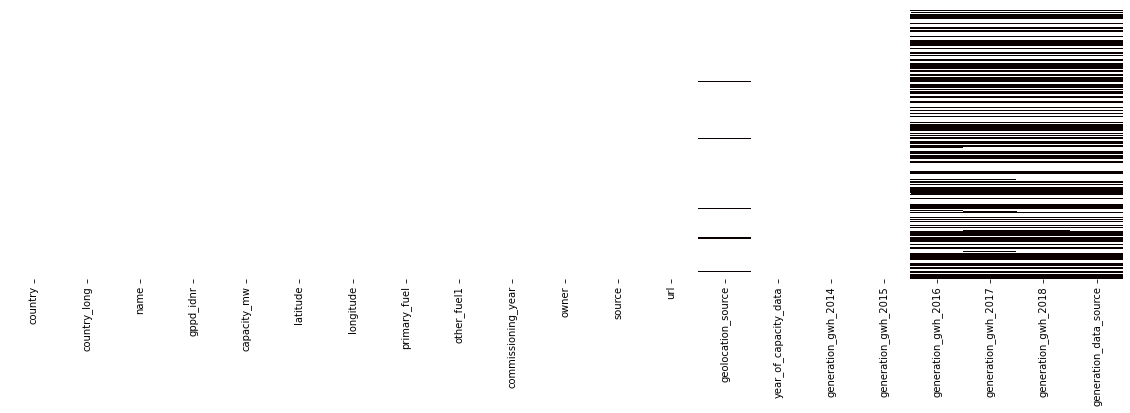

In [64]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

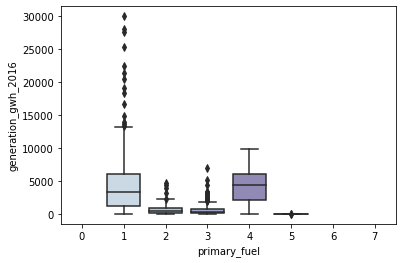

In [65]:
sn.boxplot(x='primary_fuel', y='generation_gwh_2016',data=df, palette='BuPu')

In [66]:
def impute_generation_gwh_2016(cols):
    generation_gwh_2016=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_gwh_2016):
        if primary_fuel==1:
            return random.randrange(0,5000)
        elif primary_fuel==2:
            return random.randrange(0,300)
        elif primary_fuel==3:
            return random.randrange(0,200)
        elif primary_fuel==4:
            return random.randrange(4000,5000)
        elif primary_fuel==5:
            return random.randrange(0,100)
        else:
            return random.randrange(0,5000)
    else:
        return generation_gwh_2016

In [67]:
df['generation_gwh_2016'] = df[['generation_gwh_2016', 'primary_fuel']].apply(impute_generation_gwh_2015,axis=1)

In [68]:
df['generation_gwh_2016']

0      2980.000000
1      4701.000000
2      4395.000000
3       886.004428
4      6243.000000
          ...     
902     233.596650
903     257.000000
904     772.000000
905    2729.000000
906    3593.000000
Name: generation_gwh_2016, Length: 907, dtype: float64

<AxesSubplot:>

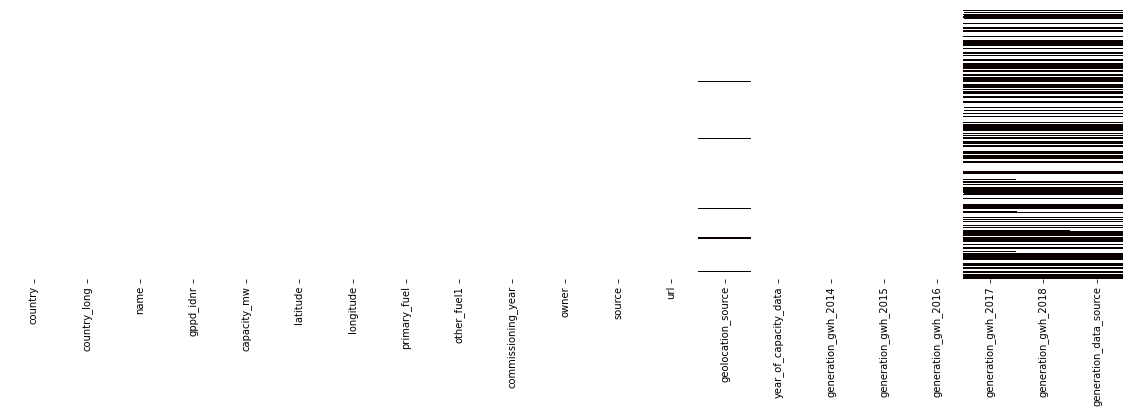

In [69]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

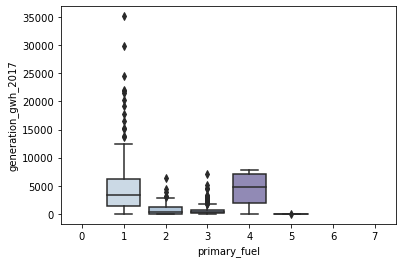

In [70]:
sn.boxplot(x='primary_fuel', y='generation_gwh_2017',data=df, palette='BuPu')

In [71]:
def impute_generation_gwh_2017(cols):
    generation_gwh_2017=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_gwh_2017):
        if primary_fuel==1:
            return random.randrange(0,5000)
        elif primary_fuel==2:
            return random.randrange(0,300)
        elif primary_fuel==3:
            return random.randrange(0,200)
        elif primary_fuel==4:
            return random.randrange(4000,5000)
        elif primary_fuel==5:
            return random.randrange(0,100)
        else:
            return random.randrange(0,5000)
    else:
        return generation_gwh_2017

In [72]:
df['generation_gwh_2017'] = df[['generation_gwh_2017', 'primary_fuel']].apply(impute_generation_gwh_2017,axis=1)

In [73]:
df['generation_gwh_2017']

0      4361.000000
1      2929.000000
2      4483.000000
3       663.774500
4      5385.579736
          ...     
902     865.400000
903     378.000000
904    2140.000000
905    2878.000000
906    3421.000000
Name: generation_gwh_2017, Length: 907, dtype: float64

<AxesSubplot:>

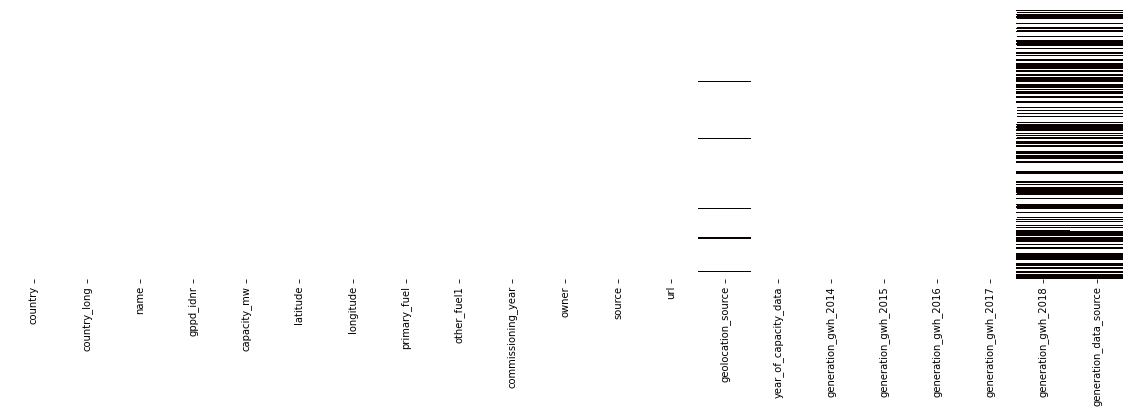

In [74]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

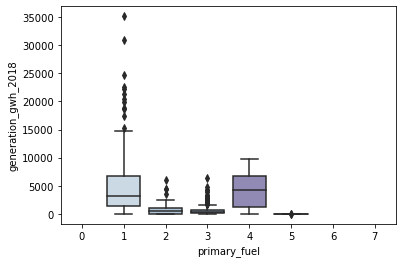

In [75]:
sn.boxplot(x='primary_fuel', y='generation_gwh_2018',data=df, palette='BuPu')

In [76]:
def impute_generation_gwh_2018(cols):
    generation_gwh_2018=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_gwh_2018):
        if primary_fuel==1:
            return random.randrange(0,5000)
        elif primary_fuel==2:
            return random.randrange(0,300)
        elif primary_fuel==3:
            return random.randrange(0,200)
        elif primary_fuel==4:
            return random.randrange(4000,5000)
        elif primary_fuel==5:
            return random.randrange(0,100)
        else:
            return random.randrange(0,5000)
    else:
        return generation_gwh_2018

In [77]:
df['generation_gwh_2018'] = df[['generation_gwh_2018', 'primary_fuel']].apply(impute_generation_gwh_2018,axis=1)

In [78]:
df['generation_gwh_2018']

0      3457.000000
1      2602.000000
2      4330.000000
3       626.239128
4      7279.000000
          ...     
902     686.500000
903    1498.000000
904    1735.000000
905    1697.000000
906      73.000000
Name: generation_gwh_2018, Length: 907, dtype: float64

<AxesSubplot:>

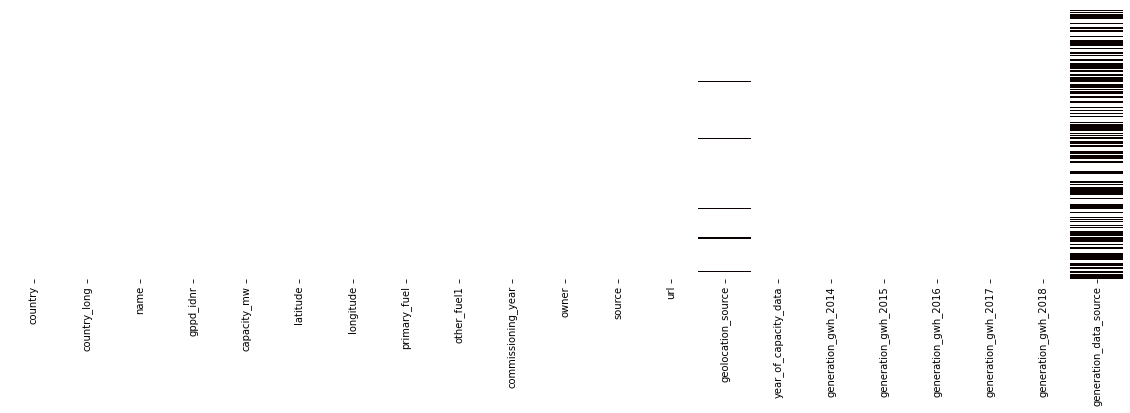

In [79]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_data_source'>

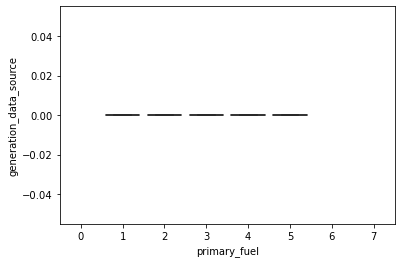

In [80]:
sn.boxplot(x='primary_fuel', y='generation_data_source',data=df, palette='BuPu')

In [81]:
def impute_generation_data_source(cols):
    generation_data_source=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(generation_data_source):
        if primary_fuel==1:
            return 0.0
        elif primary_fuel==2:
            return 0.0
        elif primary_fuel==3:
            return 0.0
        elif primary_fuel==4:
            return 0.0
        elif primary_fuel==5:
            return 0.0
        else:
            return 0.0
    else:
        return generation_data_source

In [82]:
df['generation_data_source'] = df[['generation_data_source', 'primary_fuel']].apply(impute_generation_data_source,axis=1)

In [83]:
df['generation_data_source'] 

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
902    0.0
903    0.0
904    0.0
905    0.0
906    0.0
Name: generation_data_source, Length: 907, dtype: float64

<AxesSubplot:>

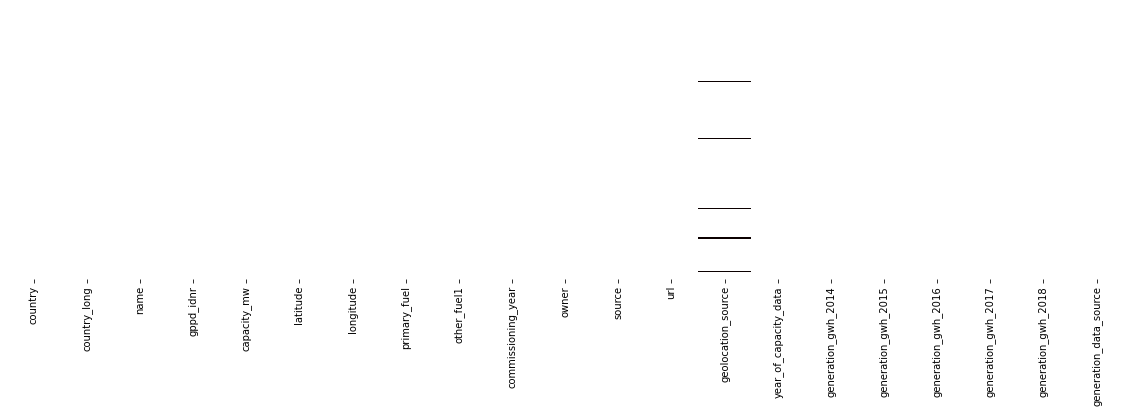

In [84]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

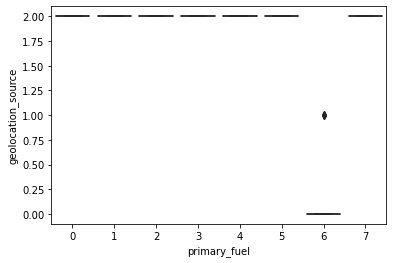

In [85]:
sn.boxplot(x='primary_fuel', y='geolocation_source',data=df, palette='BuPu')

In [86]:
def impute_geolocation_source(cols):
    geolocation_source=cols[0]
    primary_fuel=cols[1]
    
    if pd.isnull(geolocation_source):
        if primary_fuel==0:
            return 2.0
        elif primary_fuel==1:
            return 2.0
        elif primary_fuel==2:
            return 2.0
        elif primary_fuel==3:
            return 2.0
        elif primary_fuel==4:
            return 2.0
        elif primary_fuel==5:
            return 2.0
        elif primary_fuel==6:
            return 0.00
        elif primary_fuel==7:
            return 2.00
        else:
            return 1.00
    else:
        return geolocation_source

In [87]:
df['geolocation_source'] = df[['geolocation_source', 'primary_fuel']].apply(impute_geolocation_source,axis=1)

In [88]:
df['geolocation_source'] 

0      1.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
902    2.0
903    0.0
904    2.0
905    2.0
906    2.0
Name: geolocation_source, Length: 907, dtype: float64

<AxesSubplot:>

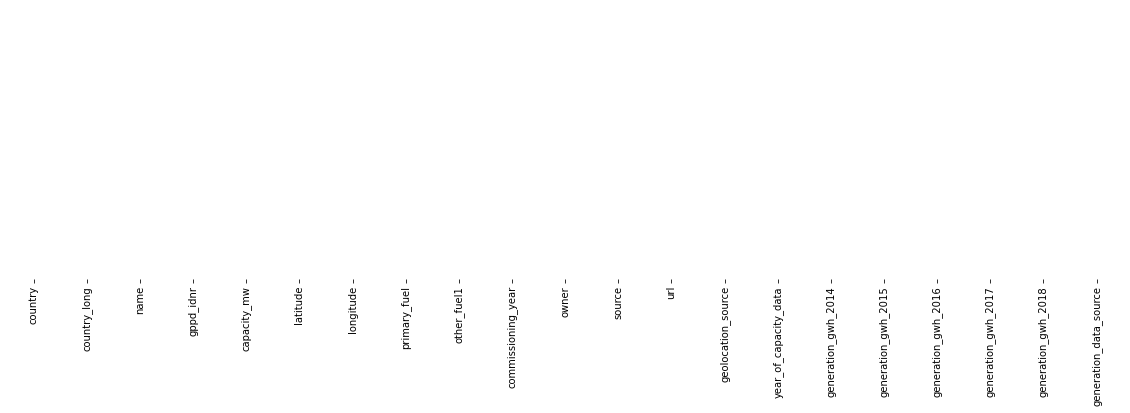

In [89]:
plt.figure(figsize=(20,5))
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot_r')

# So here we were able to treat all the columns

In [90]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,6,0.0,2011.0,229.0,109.0,128.0,1.0,2019.0,1660.000000,1090.000000,2980.000000,4361.000000,3457.000000,0.0
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,1,0.0,2015.0,258.0,174.0,173.0,2.0,2019.0,3499.000000,4176.000000,4701.000000,2929.000000,2602.000000,0.0
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,7,0.0,2015.0,2.0,21.0,205.0,2.0,2019.0,4495.000000,4234.000000,4395.000000,4483.000000,4330.000000,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2,2.0,2004.0,195.0,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1,2.0,2015.0,101.0,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,902.0,491.0,1600.0,16.2949,77.3568,1,2.0,2016.0,104.0,22.0,58.0,2.0,2019.0,1040.000000,0.994875,233.596650,865.400000,686.500000,0.0
903,0.0,0.0,903.0,822.0,3.0,12.8932,78.1654,6,0.0,2016.0,114.0,77.0,22.0,0.0,2019.0,1504.000000,142.000000,257.000000,378.000000,1498.000000,0.0
904,0.0,0.0,904.0,891.0,25.5,15.2758,75.5811,7,0.0,2015.0,150.0,21.0,260.0,2.0,2019.0,4829.000000,4381.000000,772.000000,2140.000000,1735.000000,0.0
905,0.0,0.0,905.0,539.0,80.0,24.3500,73.7477,1,0.0,2012.0,91.0,59.0,82.0,2.0,2019.0,1871.000000,1390.000000,2729.000000,2878.000000,1697.000000,0.0


# Checking VIF ( Variance Inflation Factor )

In [91]:
FIRST = df[['primary_fuel', 'country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source']]

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(FIRST):
    vif=pd.DataFrame()
    vif["F"] = FIRST.columns
    vif["VIF_Value"] = [variance_inflation_factor(FIRST.values, i)for i in range(FIRST.shape[1])]
    return(vif)

F=FIRST.iloc[:,1:]
F.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,0.0,2011.0,229.0,109.0,128.0,1.0,2019.0,1660.000000,1090.000,2980.000000,4361.000000,3457.000000,0.0
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,0.0,2015.0,258.0,174.0,173.0,2.0,2019.0,3499.000000,4176.000,4701.000000,2929.000000,2602.000000,0.0
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,0.0,2015.0,2.0,21.0,205.0,2.0,2019.0,4495.000000,4234.000,4395.000000,4483.000000,4330.000000,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,195.0,22.0,58.0,2.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,2.0,2015.0,101.0,22.0,58.0,2.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0.0


In [93]:
calculate_vif(F)

,F,VIF_Value
0,country,NaN
1,country_long,NaN
2,name,1.907701
3,gppd_idnr,6.081966
4,capacity_mw,5.603504
5,latitude,1.111480
6,longitude,1.069183
7,other_fuel1,2.544390
8,commissioning_year,1.828491
9,owner,2.260516


In [94]:
df.drop(columns=['country', 'country_long', 'generation_data_source', 'year_of_capacity_data'],axis=1,inplace=True)

* Since country_long and country both and generation_data_source have NaN values we them with year_of_capacity_data having high correlation and single data values

# Outlier Check and Removal

In [95]:
df1 = df[['primary_fuel', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'other_fuel1', 'commissioning_year']]

In [96]:
df2 = df[['owner', 'source', 'url', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

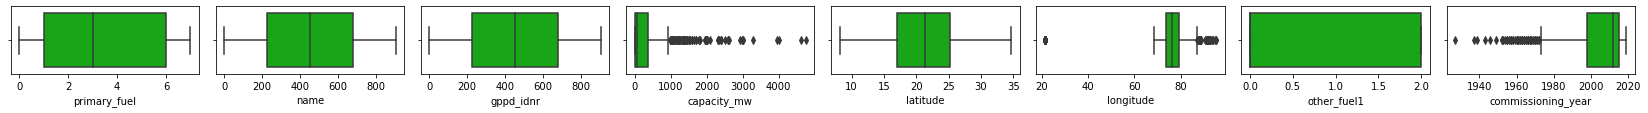

In [97]:
Columns = df1.columns.values
ncolumns = 14
nrows = 10
plt.figure(figsize=[40,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='nipy_spectral')
    plt.tight_layout()

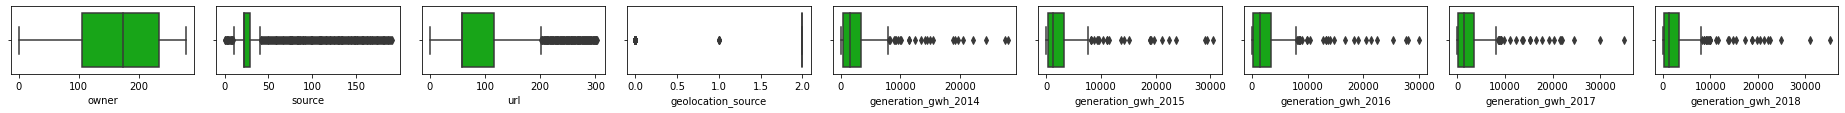

In [98]:
Columns = df2.columns.values
ncolumns = 14
nrows = 10
plt.figure(figsize=[40,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df2[Columns[i]], color='green', orient='H', palette='nipy_spectral')
    plt.tight_layout()

In [99]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(907, 17)

In [100]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([ 14,  15,  15,  15,  15,  25,  42,  45,  67,  71,  72,  80, 143,
       143, 143, 143, 143, 147, 158, 178, 191, 192, 201, 208, 209, 209,
       209, 209, 209, 222, 250, 299, 308, 308, 308, 308, 308, 308, 321,
       329, 330, 332, 342, 345, 363, 364, 364, 364, 364, 364, 364, 371,
       375, 386, 420, 422, 430, 435, 440, 444, 454, 466, 478, 478, 479,
       482, 483, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494,
       494, 494, 502, 538, 538, 540, 541, 545, 573, 583, 601, 621, 648,
       648, 648, 648, 648, 648, 655, 657, 657, 657, 657, 657, 657, 661,
       669, 674, 680, 689, 695, 695, 695, 695, 695, 695, 705, 706, 709,
       711, 712, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726,
       726, 726, 726, 728, 731, 732, 741, 767, 770, 773, 774, 775, 776,
       784, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808,
       808, 808, 828, 832, 848, 870, 871, 879, 880, 880, 880, 880, 880,
       880, 884, 886, 895, 900], dtype=int64), array([ 4,  2, 1

In [101]:
new_df.shape

(807, 17)

# DataLoss %

In [102]:
Loss = (907/807)/907*100

In [103]:
Loss

0.12391573729863693

* Here we observe a Datasloss of 0.12% after the Outlier check adnd removal

# EDA

# Univariate Analysis

In [104]:
new_df.skew()

name                   0.043316
gppd_idnr             -0.029221
capacity_mw            1.908441
latitude              -0.136032
longitude              1.166536
primary_fuel           0.460196
other_fuel1            0.917347
commissioning_year    -1.412346
owner                 -0.394260
source                 1.761643
url                    1.518263
geolocation_source    -2.034658
generation_gwh_2014    1.086692
generation_gwh_2015    1.132326
generation_gwh_2016    1.105278
generation_gwh_2017    1.061858
generation_gwh_2018    1.130515
dtype: float64

<AxesSubplot:xlabel='name', ylabel='Density'>

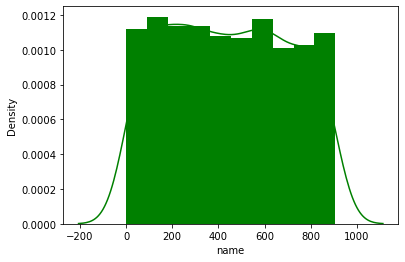

In [105]:
sn.distplot(new_df["name"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

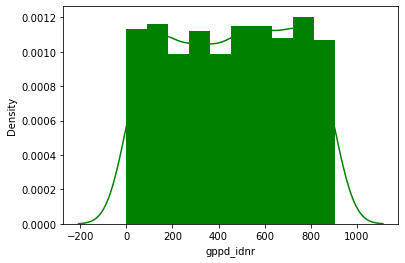

In [106]:
sn.distplot(new_df["gppd_idnr"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

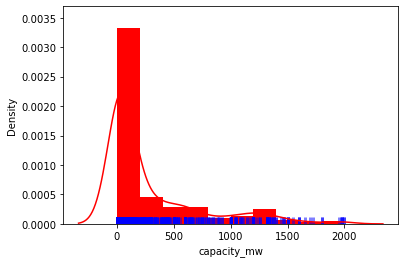

In [107]:
sn.distplot(new_df["capacity_mw"],bins=10,hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.03})

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='latitude', ylabel='Density'>

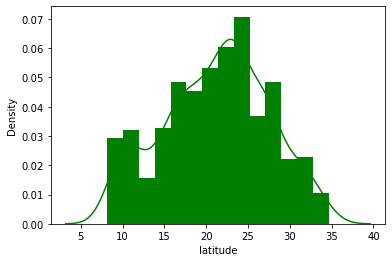

In [108]:
sn.distplot(new_df["latitude"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='longitude', ylabel='Density'>

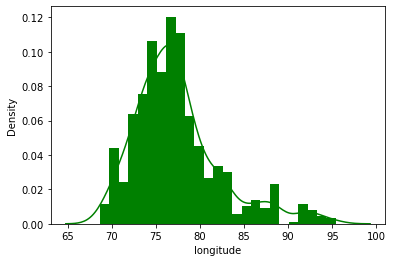

In [109]:
sn.distplot(new_df["longitude"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

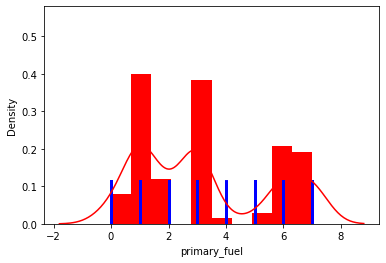

In [110]:
sn.distplot(new_df["primary_fuel"],bins=10,hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2,})

* Here we observe a good distribution of data

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

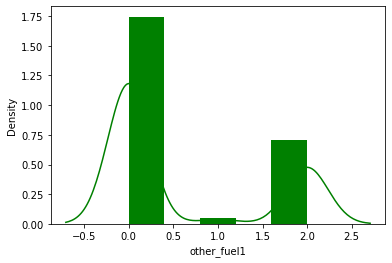

In [111]:
sn.distplot(new_df["other_fuel1"], hist_kws={'alpha':1}, color='g')

* Here we observe a moderately skewed distribution of data

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

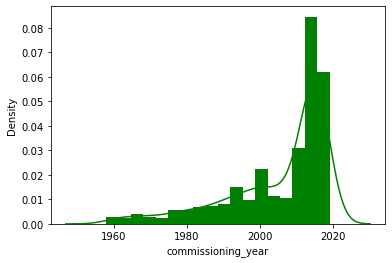

In [112]:
sn.distplot(new_df["commissioning_year"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed negative distribution of data

<AxesSubplot:xlabel='owner', ylabel='Density'>

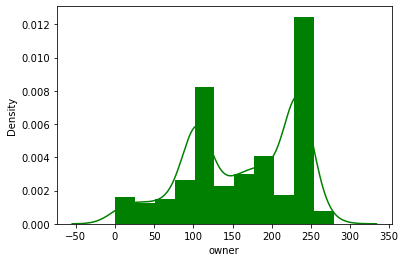

In [113]:
sn.distplot(new_df["owner"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='source', ylabel='Density'>

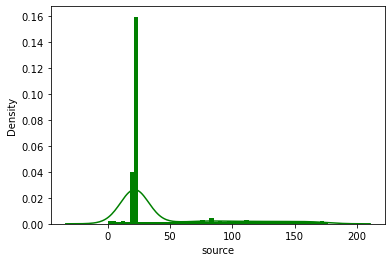

In [114]:
sn.distplot(new_df["source"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='url', ylabel='Density'>

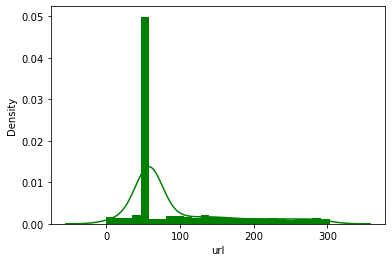

In [115]:
sn.distplot(new_df["url"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

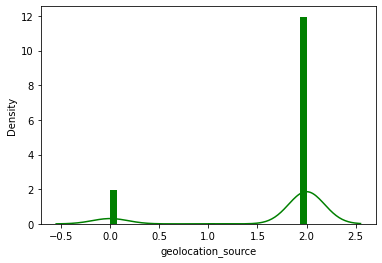

In [116]:
sn.distplot(new_df["geolocation_source"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed negative distribution of data

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

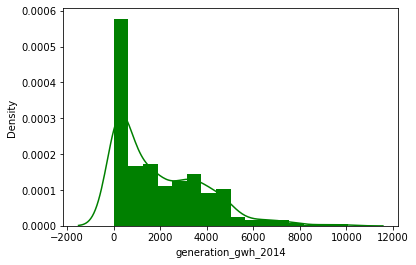

In [117]:
sn.distplot(new_df["generation_gwh_2014"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

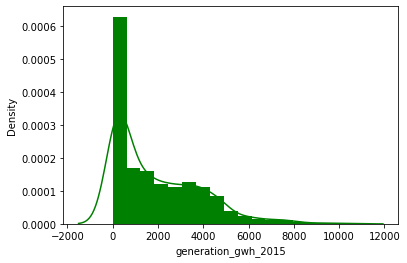

In [118]:
sn.distplot(new_df["generation_gwh_2015"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

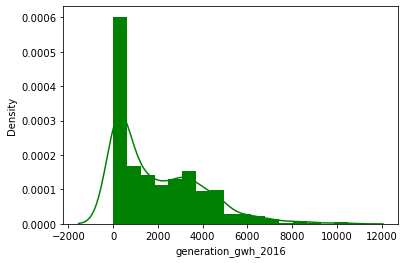

In [119]:
sn.distplot(new_df["generation_gwh_2016"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

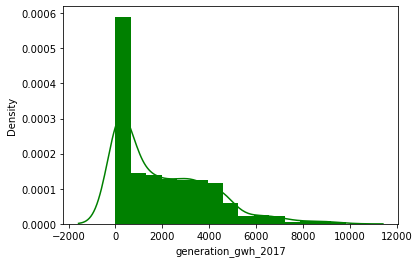

In [120]:
sn.distplot(new_df["generation_gwh_2017"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

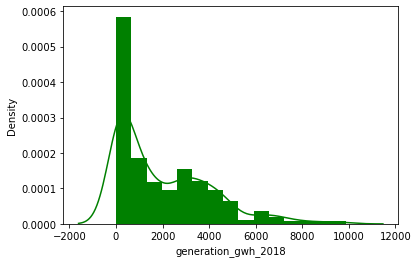

In [121]:
sn.distplot(new_df["generation_gwh_2018"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

# Scatterplot

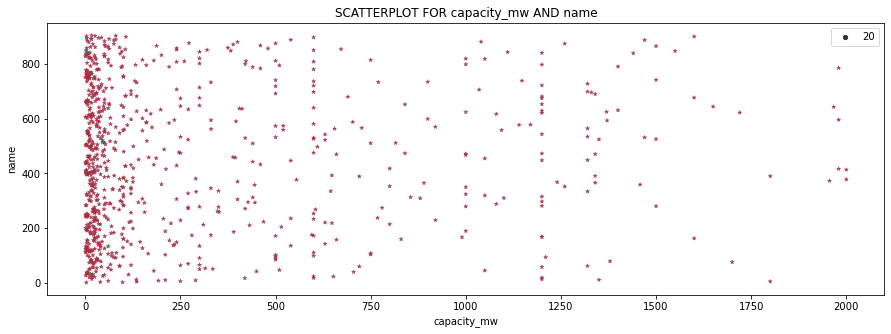

In [122]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND name')

sn.scatterplot(new_df['capacity_mw'], new_df['name'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw from 0 to 10 has majority data scattered for name data from 10 to 800+ 

# 

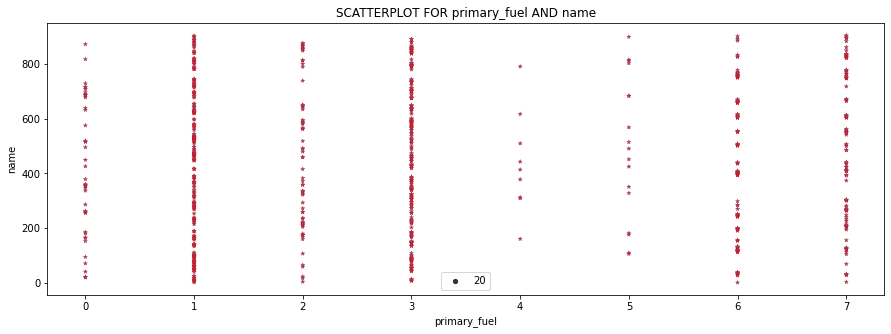

In [123]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND name')

sn.scatterplot(new_df['primary_fuel'], new_df['name'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Primary fuel type 1(coal) and 3(hydro) has highest data scattered for name data

# 

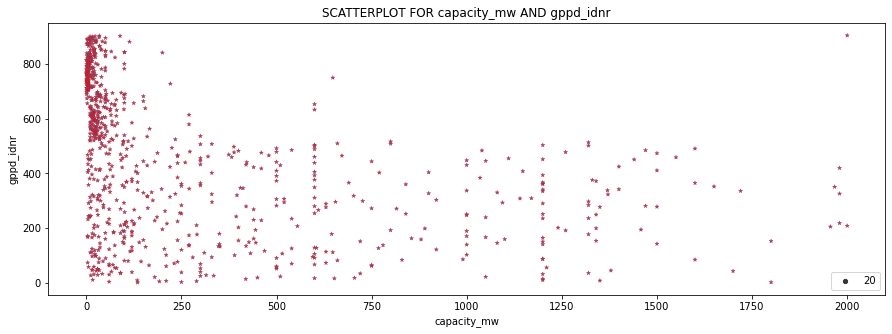

In [124]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND gppd_idnr')

sn.scatterplot(new_df['capacity_mw'], new_df['gppd_idnr'], size=20, marker ="*", edgecolor ="red", alpha=1);

# 

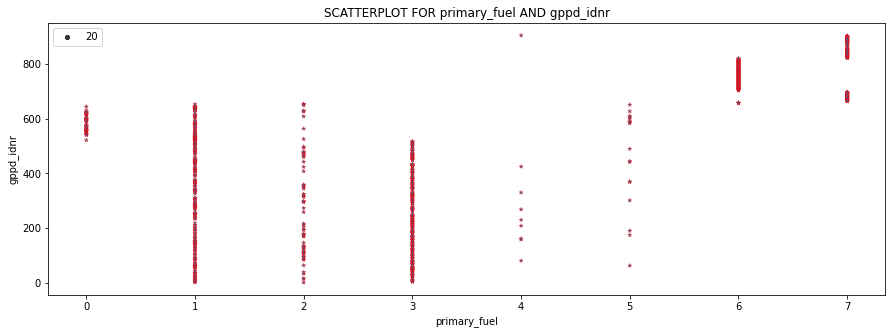

In [125]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND gppd_idnr')

sn.scatterplot(new_df['primary_fuel'], new_df['gppd_idnr'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Primary fuel type 1(coal) and 3(hydro) has highest data scattered for gppd_idnr data

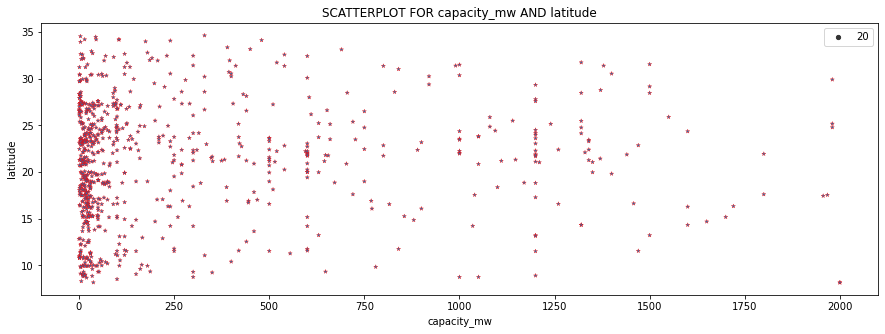

In [126]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND latitude')

sn.scatterplot(new_df['capacity_mw'], new_df['latitude'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw from 0 to 10 has majority data scattered for latitude data type from 10 to 28 at 

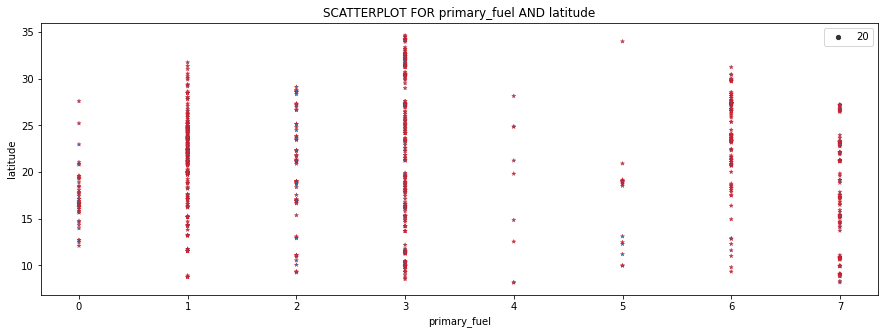

In [127]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND latitude')

sn.scatterplot(new_df['primary_fuel'], new_df['latitude'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Primary fuel type 3(hydro) has highest data scattered for latitude data

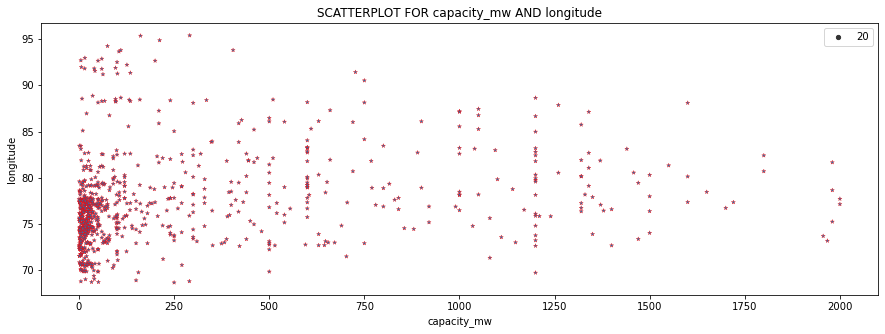

In [128]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND longitude')

sn.scatterplot(new_df['capacity_mw'], new_df['longitude'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for longitude data type from 70 to 80

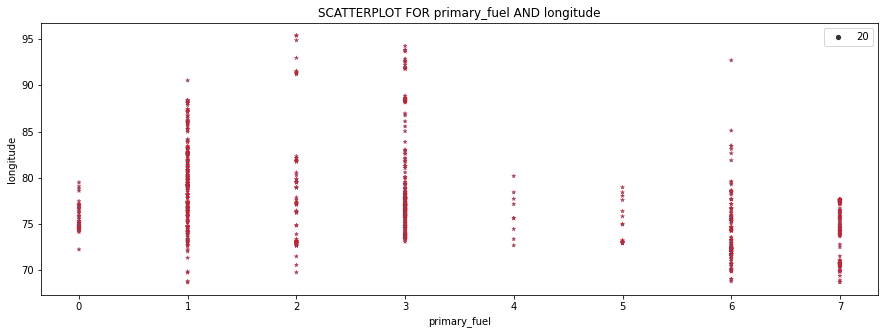

In [129]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND longitude')

sn.scatterplot(new_df['primary_fuel'], new_df['longitude'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Primary fuel type 1(coal) and 3(hydro) has highest data scattered for  longitude data

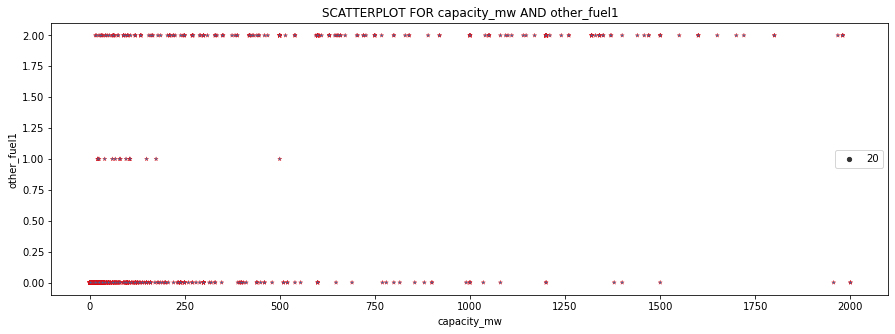

In [130]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND other_fuel1')

sn.scatterplot(new_df['capacity_mw'], new_df['other_fuel1'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for other_fuel1 data type 2(oil)

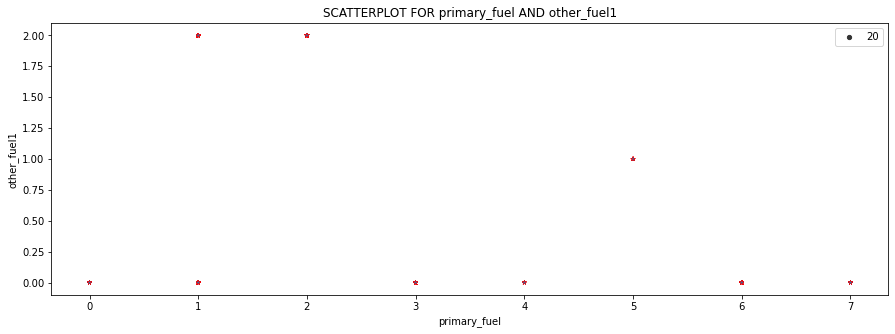

In [131]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND other_fuel1')

sn.scatterplot(new_df['primary_fuel'], new_df['other_fuel1'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Primary fuel type 5(Oil) has highest data scattered for other_fuel1 type 1

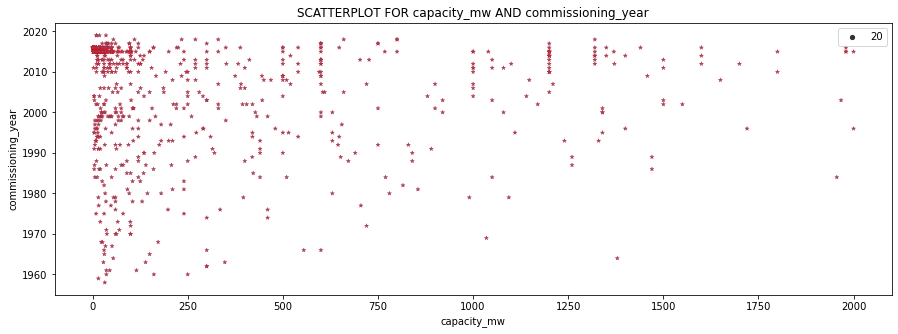

In [132]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND commissioning_year')

sn.scatterplot(new_df['capacity_mw'], new_df['commissioning_year'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for commissioning_year data at from 2010-2020

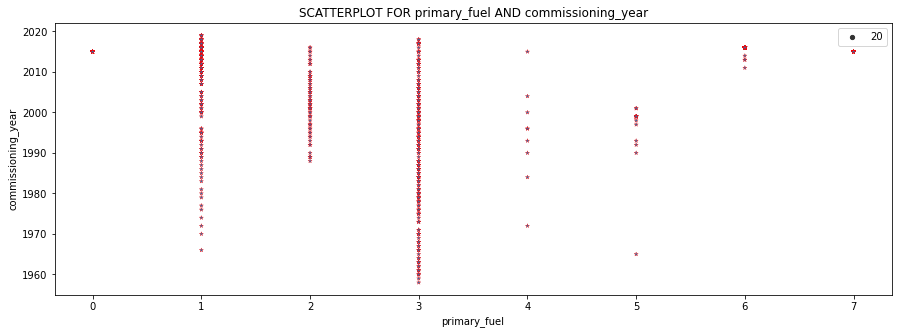

In [133]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND commissioning_year')

sn.scatterplot(new_df['primary_fuel'], new_df['commissioning_year'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 3(hydro) has highest scattered data for commissioning_year data

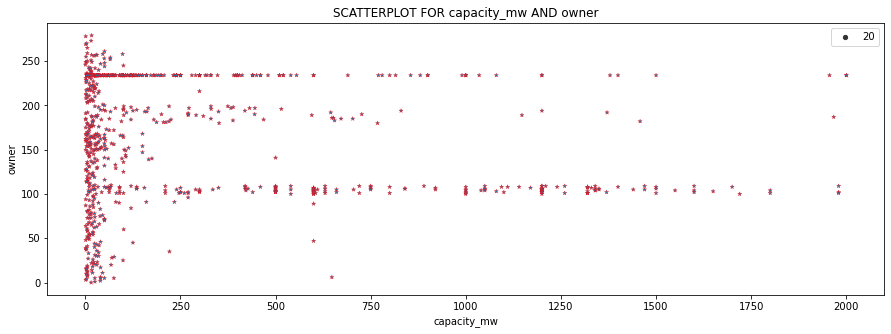

In [134]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND owner')

sn.scatterplot(new_df['capacity_mw'], new_df['owner'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for owner data at from 100-50 and from 200-250

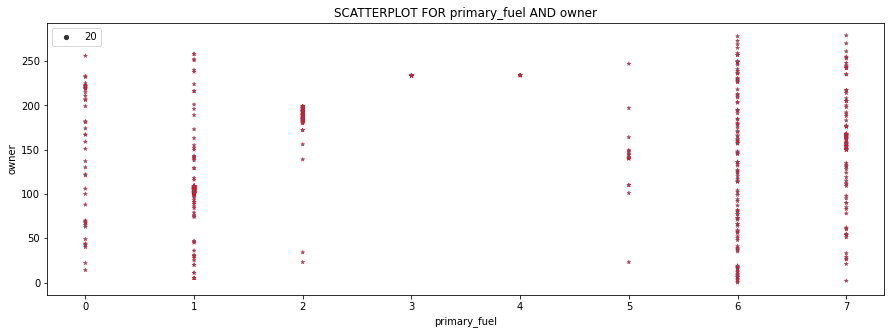

In [135]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND owner')

sn.scatterplot(new_df['primary_fuel'], new_df['owner'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 6(solar) and 7(wind) has highest scattered data for owner data

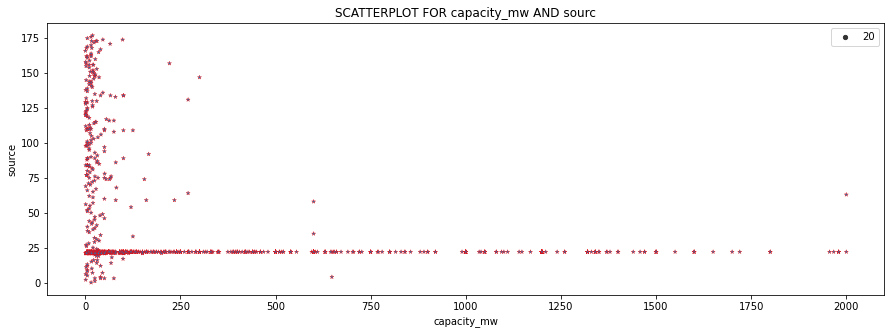

In [136]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND sourc')

sn.scatterplot(new_df['capacity_mw'], new_df['source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for source data at 25

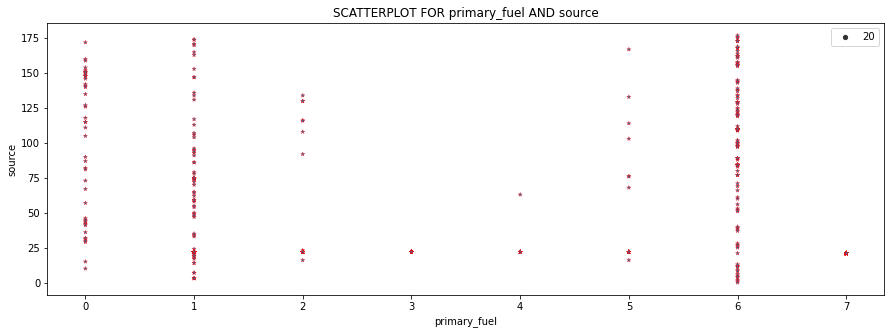

In [137]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND source')

sn.scatterplot(new_df['primary_fuel'], new_df['source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) and 6(solar) has highest scattered data for source data

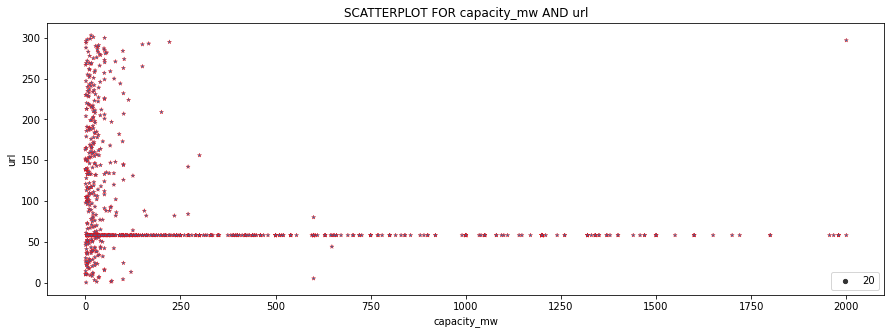

In [138]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND url')

sn.scatterplot(new_df['capacity_mw'], new_df['url'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for url data at 50

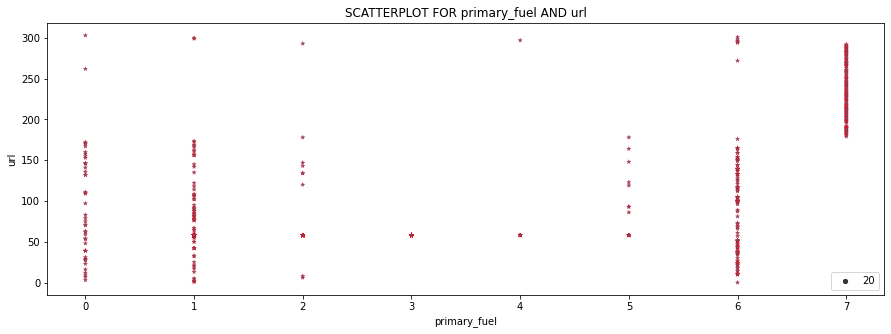

In [139]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND url')

sn.scatterplot(new_df['primary_fuel'], new_df['url'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) and 6(solar) has highest scattered data for url data

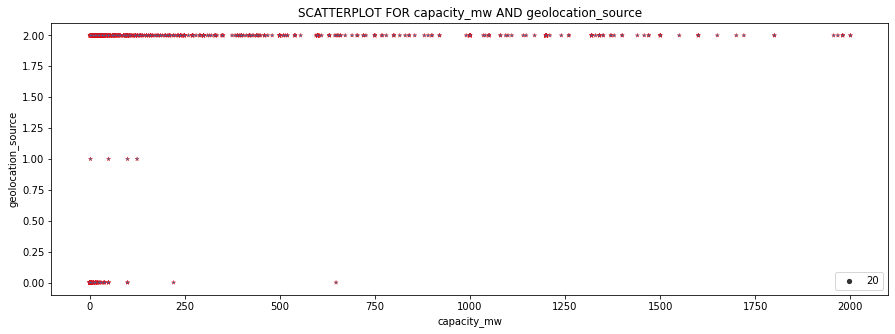

In [140]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND geolocation_source')

sn.scatterplot(new_df['capacity_mw'], new_df['geolocation_source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data scattered for geolocation_source data

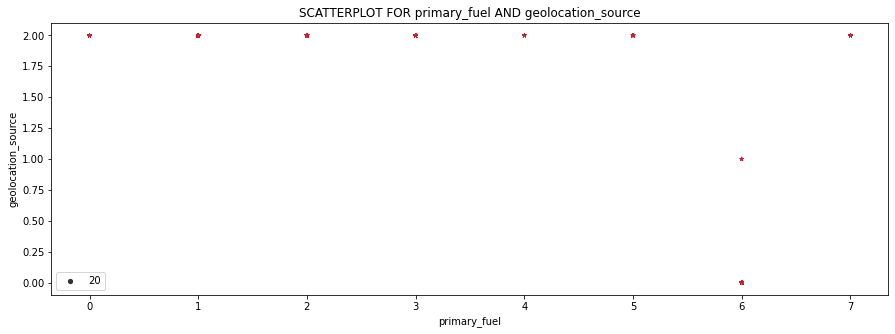

In [141]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND geolocation_source')

sn.scatterplot(new_df['primary_fuel'], new_df['geolocation_source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 6(solar) has highest scattered data for geolocation_source 1 data

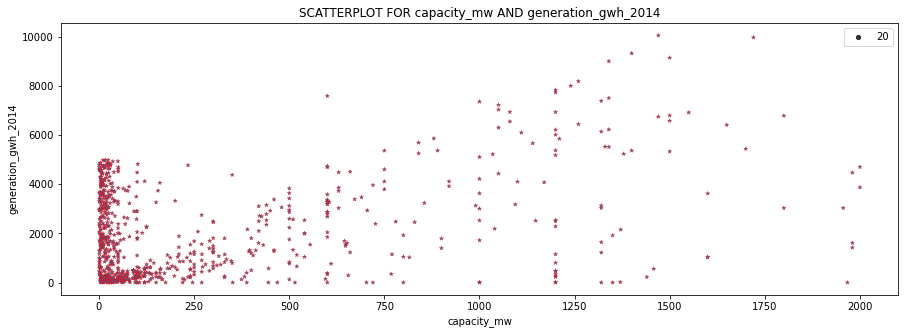

In [142]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND generation_gwh_2014')

sn.scatterplot(new_df['capacity_mw'], new_df['generation_gwh_2014'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data between 0-5000 for generation_gwh_2014 data

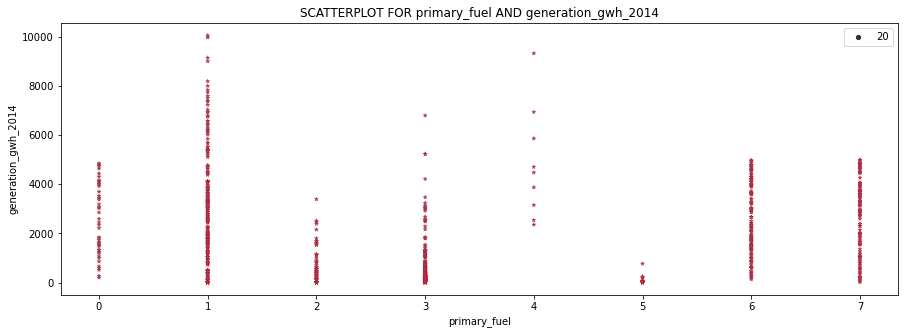

In [143]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND generation_gwh_2014')

sn.scatterplot(new_df['primary_fuel'], new_df['generation_gwh_2014'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) has highest scattered data for generation_gwh_2014 data

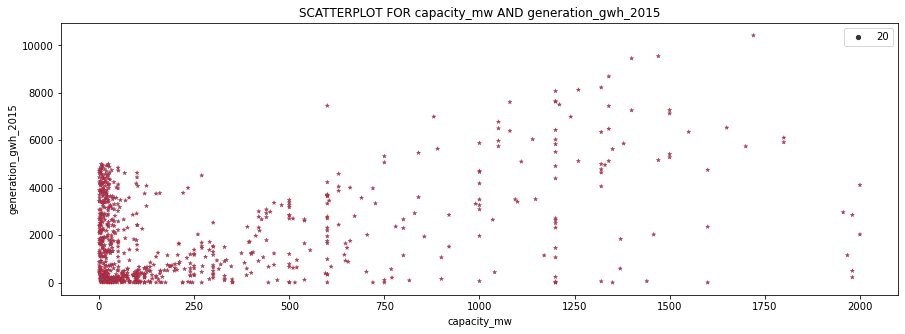

In [144]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND generation_gwh_2015')

sn.scatterplot(new_df['capacity_mw'], new_df['generation_gwh_2015'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data between 0-5000 for generation_gwh_2015 data

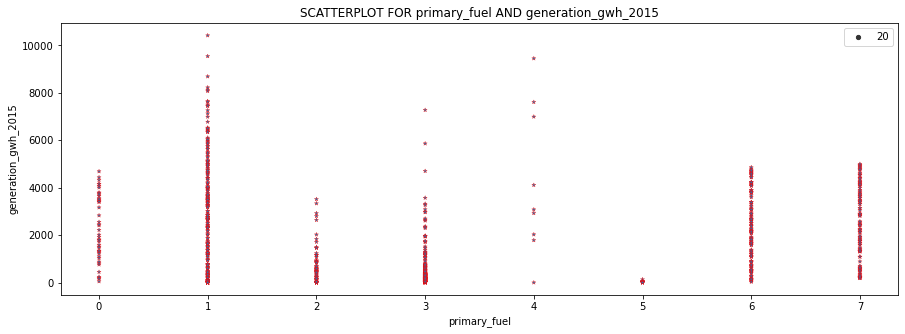

In [145]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND generation_gwh_2015')

sn.scatterplot(new_df['primary_fuel'], new_df['generation_gwh_2015'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) has highest scattered data for generation_gwh_2015 data

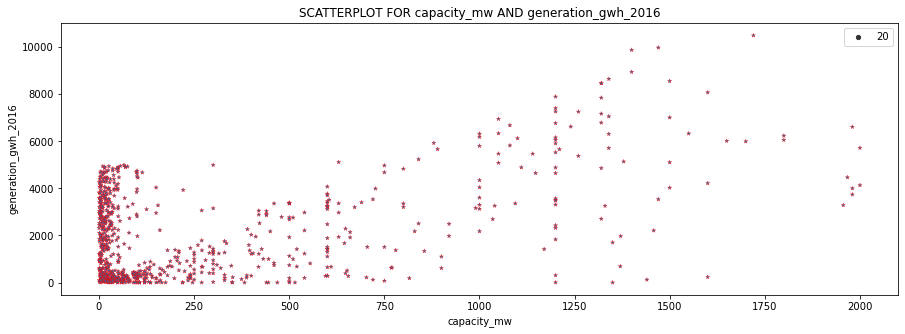

In [146]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND generation_gwh_2016')

sn.scatterplot(new_df['capacity_mw'], new_df['generation_gwh_2016'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data between 0-5000 for generation_gwh_2016 data

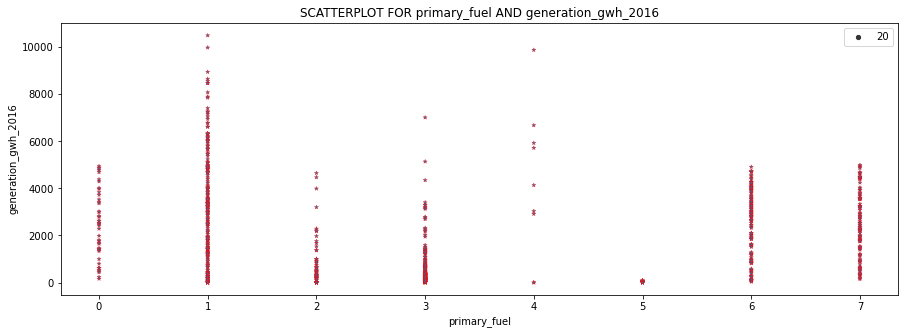

In [147]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND generation_gwh_2016')

sn.scatterplot(new_df['primary_fuel'], new_df['generation_gwh_2016'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) has highest scattered data for generation_gwh_2016 data

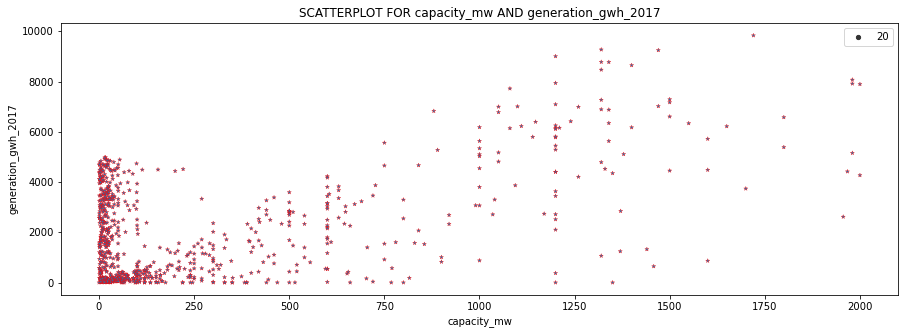

In [148]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND generation_gwh_2017')

sn.scatterplot(new_df['capacity_mw'], new_df['generation_gwh_2017'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data between 0-5000 for generation_gwh_2017 data

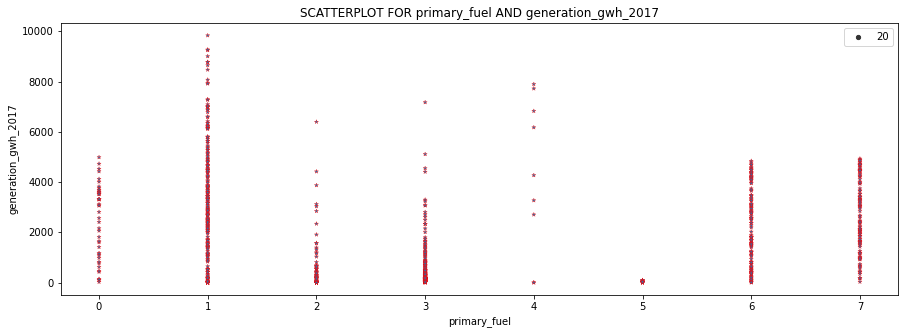

In [149]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND generation_gwh_2017')

sn.scatterplot(new_df['primary_fuel'], new_df['generation_gwh_2017'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) has highest scattered data for generation_gwh_2017 data

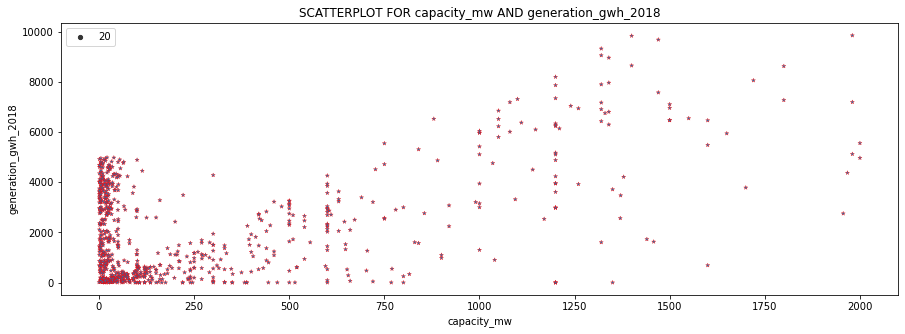

In [150]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR capacity_mw AND generation_gwh_2018')

sn.scatterplot(new_df['capacity_mw'], new_df['generation_gwh_2018'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that capacity_mw has majority data between 0-5000 for generation_gwh_2018 data

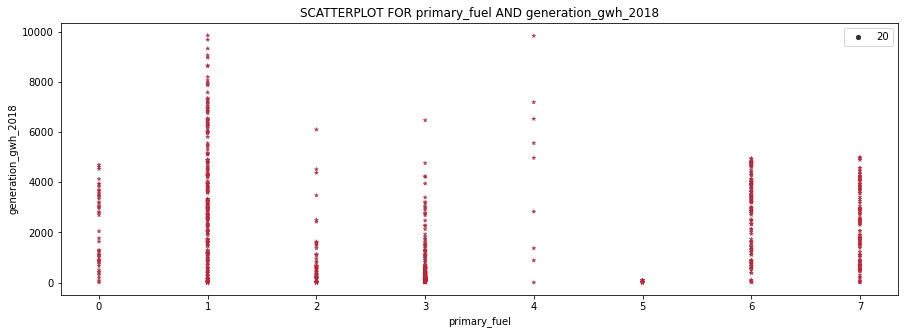

In [151]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR primary_fuel AND generation_gwh_2018')

sn.scatterplot(new_df['primary_fuel'], new_df['generation_gwh_2018'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe primary fuel type 1(coal) has highest scattered data for generation_gwh_2018 data